Ingeniería de Características: Transformaciones de Variables (Core)

 Descripción:

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques



Objetivo:

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Carga de datos:

* Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
* Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

In [70]:
# Carga de los dos datasets
data = pd.read_csv('../data/trainhouse.csv')
data_unmod = pd.read_csv('../data/trainhouse.csv')
print(data.shape)
data.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


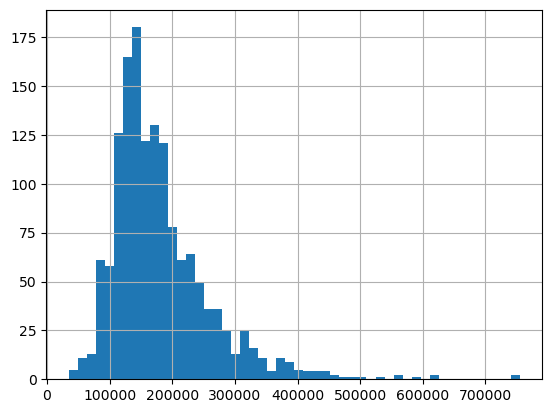

In [71]:
# Histograma de SalePrice
data['SalePrice'].hist(bins=50)
plt.show()

In [72]:
# Identificación y eliminación de valores duplicados
print("Duplicados: ", data.duplicated().sum())

Duplicados:  0


In [73]:
# Verificación y ajuste de tipos de datos:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
# Creo un diccionario con los tipos de datos deseados y los reemplazo
data_type = {
    'MSZoning' : 'category',
    'Street' : 'category',
    'Utilities' : 'category',
    'BldgType' : 'category',
    'CentralAir' : 'category',
    'HeatingQC' : 'category',
    'BsmtCond' : 'category',
    'SaleCondition' : 'category',
}
data = data.astype(data_type)
data_unmod = data_unmod.astype(data_type)
print(data.dtypes)

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object


In [75]:
# Manejo de valores faltantes adecuadamente: 
qsna=data.shape[0]-data.isnull().sum(axis=0)
qna=data.isnull().sum(axis=0)
ppna=round(100*(data.isnull().sum(axis=0)/data.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)


,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
...,...,...,...
ExterQual,1460,0,0.00
Exterior2nd,1460,0,0.00
Exterior1st,1460,0,0.00
RoofMatl,1460,0,0.00


In [76]:
# Defino mis columnas de interes
columnas_num_alimpiar = ['MSSubClass', 'LotArea', 'YearBuilt', 'OverallCond',
                      'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                        'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
                        'TotRmsAbvGrd', 'SalePrice']

# Imprimir la cantidad de valores nulos en cada columna
columnas_verif_na = data[columnas_num_alimpiar].isnull().sum()
print(columnas_verif_na)

MSSubClass      0
LotArea         0
YearBuilt       0
OverallCond     0
YearRemodAdd    0
1stFlrSF        0
2ndFlrSF        0
BsmtFullBath    0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64


### Limpieza de test.csv
De modo a no complicarme con otros metodos decidi limpiarlo por separado

In [77]:
test = pd.read_csv('../data/testhouse.csv')
test_unmod = pd.read_csv('../data/testhouse.csv')

In [78]:
# Identificación y eliminación de valores duplicados
print("Duplicados: ", test.duplicated().sum())

# Creo un diccionario con los tipos de datos deseados y los reemplazo
test_type = {
    'MSZoning' : 'category',
    'Street' : 'category',
    'Utilities' : 'category',
    'BldgType' : 'category',
    'CentralAir' : 'category',
    'HeatingQC' : 'category',
    'BsmtCond' : 'category',
    'SaleCondition' : 'category',
}
test = test.astype(test_type)
test_unmod = test_unmod.astype(test_type)
print(test.dtypes)

# Defino mis columnas de interes
columnastest_alimpiar = ['MSSubClass', 'LotArea', 'YearBuilt',
                      'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                        'BsmtFullBath', 'HalfBath', 'BedroomAbvGr',
                        'TotRmsAbvGrd', 'PoolArea']

# Imprimir la cantidad de valores nulos en cada columna
columnas_verif_nan = test[columnastest_alimpiar].isnull().sum()
print("valores nulos en columnas numericas: ", columnas_verif_nan)

cat_nan_test = ['MSZoning', 'Street', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']
test_nan_check = test[cat_nan_test].isnull().sum()
print("valores nulos en columnas categoricas: ", test_nan_check)


Duplicados:  0
Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MiscVal             int64
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition    category
Length: 80, dtype: object
valores nulos en columnas numericas:  MSSubClass      0
LotArea         0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
2ndFlrSF        0
BsmtFullBath    2
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
PoolArea        0
dtype: int64
valores nulos en columnas categoricas:  MSZoning      4
Street        0
BldgType      0
Utilities     2
HeatingQC     0
CentralAir    0
dtype: int64


In [79]:
# eliminamos los pocos datos nulos
test = test.dropna(subset=['BsmtFullBath'])
test_unmod = test_unmod.dropna(subset=['BsmtFullBath'])
test = test.dropna(subset=['Utilities'])
test_unmod = test_unmod.dropna(subset=['Utilities'])


# 2. Exploración y preprocesamiento de datos:
  * Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
  * También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

In [80]:
columnas_num = ['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'OverallCond',
                'TotRmsAbvGrd', 'PoolArea', 'SalePrice']

# Usar describe en las columnas seleccionadas
data[columnas_num].describe()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,OverallCond,TotRmsAbvGrd,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1971.267808,1984.865753,1162.626712,346.992466,0.425342,0.382877,2.866438,5.575342,6.517808,2.758904,180921.195890
std,42.300571,9981.264932,30.202904,20.645407,386.587738,436.528436,0.518911,0.502885,0.815778,1.112799,1.625393,40.177307,79442.502883
min,20.000000,1300.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,34900.000000
25%,20.000000,7553.500000,1954.000000,1967.000000,882.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,0.000000,129975.000000
50%,50.000000,9478.500000,1973.000000,1994.000000,1087.000000,0.000000,0.000000,0.000000,3.000000,5.000000,6.000000,0.000000,163000.000000
75%,70.000000,11601.500000,2000.000000,2004.000000,1391.250000,728.000000,1.000000,1.000000,3.000000,6.000000,7.000000,0.000000,214000.000000
max,190.000000,215245.000000,2010.000000,2010.000000,4692.000000,2065.000000,3.000000,2.000000,8.000000,9.000000,14.000000,738.000000,755000.000000


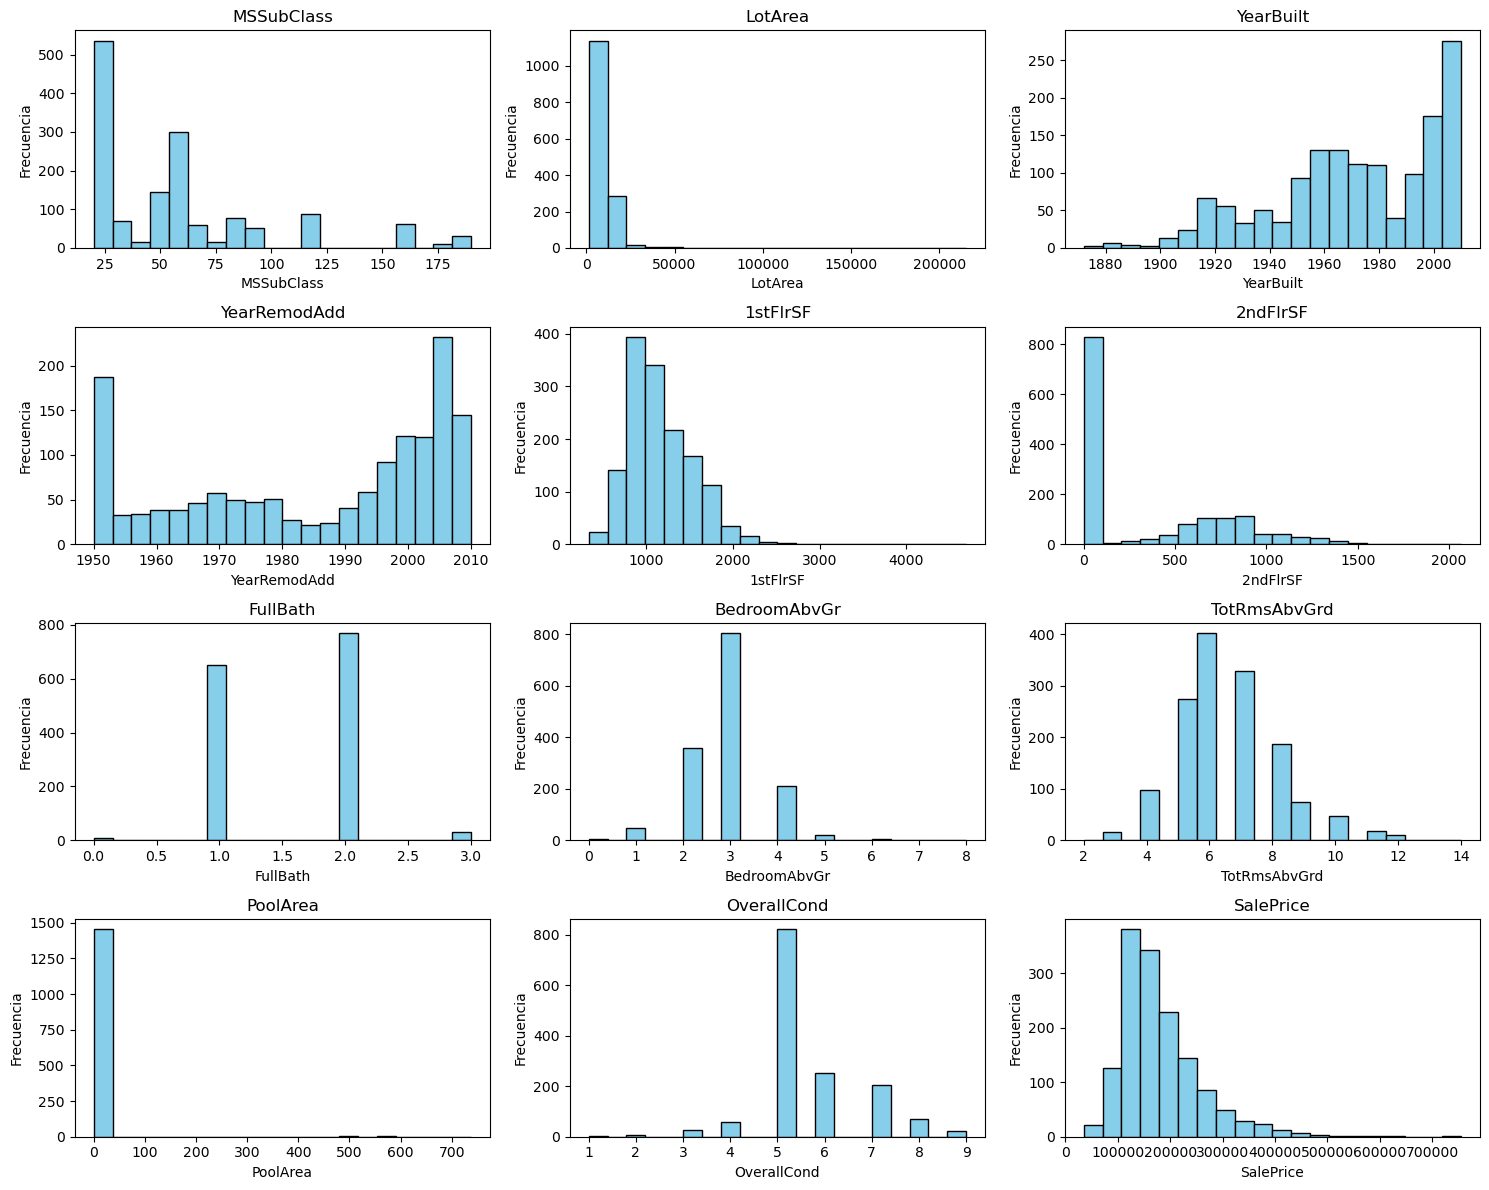

In [81]:
# Lista de columnas específicas, incluyendo 'SalePrice'
columnas = ['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
            'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'PoolArea','OverallCond', 'SalePrice']

# Configuración de la cuadrícula
plt.figure(figsize=(15, 12))
for i, columna in enumerate(columnas, 1):
    plt.subplot(4, 3, i)  # Crear una cuadrícula de 4 filas y 3 columnas
    plt.hist(data[columna].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(columna)
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# 3. Transformaciones de variables:

## Aplica transformaciones logarítmicas a variables sesgadas
* como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.

In [82]:
# Aplicar logaritmo a las columnas seleccionadas
for col in ['SalePrice', '1stFlrSF', 'YearBuilt']:
    data[col] = np.log1p(data[col])

## Crea variables polinómicas a partir de las variables numéricas
* Como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.

In [83]:
# Crear tamaño total de la casa
data['TotalSize'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['LotArea']

# Agregar variables polinómicas
data['TotalSize^2'] = data['TotalSize'] ** 2
data['TotalSize^3'] = data['TotalSize'] ** 3
data['LotArea^2'] = data['LotArea'] ** 2

In [84]:
# Crear tamaño total de la casa
test['TotalSize'] = test['1stFlrSF'] + data['2ndFlrSF'] + data['LotArea']

# Agregar variables polinómicas
test['TotalSize^2'] = test['TotalSize'] ** 2
test['TotalSize^3'] = test['TotalSize'] ** 3
test['LotArea^2'] = test['LotArea'] ** 2

##  Estandariza las variables numéricas

In [85]:
# Definir las columnas numéricas y categóricas
columnas_num = ['MSSubClass', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                'TotalSize', 'TotalSize^2', 'TotalSize^3', 'LotArea^2']
columnas_cat = ['MSZoning', 'Street', 'OverallCond', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']

# Separar las características y la variable objetivo en el conjunto de entrenamiento
X = data[['MSSubClass', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                'TotalSize', 'TotalSize^2', 'TotalSize^3', 'LotArea^2', 'MSZoning', 'Street', 'OverallCond', 
                'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']]
y = data['SalePrice']
X_test = test

# Preprocesamiento: escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_cat)
    ])

# 4. Evaluación de las transformaciones:
* Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
* Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

## Modelo de RF con las transformaciones

In [86]:
# Crear un pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Dividir los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en validación
y_pred_val = pipeline.predict(X_val)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"RMSE: {rmse}")

# Calcular el R²
r2 = r2_score(y_val, y_pred_val)
print(f"R²: {r2}")

RMSE: 0.1653451356343653
R²: 0.8534972989283354


## Modelo de RF sin las transformaciones

In [87]:
# Definir las columnas numéricas y categóricas
columnas_num2 = ['MSSubClass', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd']
columnas_cat2 = ['MSZoning', 'Street', 'OverallCond', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']

# Separar las características y la variable objetivo en el conjunto de entrenamiento
X = data_unmod[['MSSubClass', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                'MSZoning', 'Street', 'OverallCond', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']]
y = data_unmod['SalePrice']
X_test = test_unmod

# Preprocesamiento: escalar las variables numéricas y codificar las categóricas
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_num2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_cat2)
    ])

In [88]:
# Crear un pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Dividir los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en validación
y_pred_val = pipeline.predict(X_val)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"RMSE: {rmse}")

# Calcular el R²
r2 = r2_score(y_val, y_pred_val)
print(f"R²: {r2}")

RMSE: 31898.533157267055
R²: 0.8673437882430803


# 5. Interpretación de los resultados:
* Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas:

Despues de realizar la comparacion en los resultados se concluye que las transformaciones logaritmicas tuvieron un impacto muy positivo en la prediccion ya que se verifica un rmse muy bajo con respecto al modelo sin la transformacion, por lo contrario, la creacion de variables polinomicas no ayudo a mejorar el modelo, de hecho lo empeoro un poco, esto podria deberse a que no captaron informacion util para la prediccion.

* Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.

Es muy importante tranformar las variables antes de aplicar los modelos ya que afectan enormemente el resultado obtenido, esto debe hacerse despues de analizar los datos y ver que tipo de transformacion se necesita para mejorar la prediccion.